In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from cs231n.data_utils import load_cifar10
from cs231n.classifiers import KNearestNeighbor


#窗口内部显示
%matplotlib inline

#设置默认画板大小
plt.rcParams['figure.figsize']=[10.0, 8.0]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
x_train, y_train, x_test, y_test = load_cifar10('/Users/aily/code/tensorflow/cs231n/assignment1/cs231n/datasets/cifar-10-batches-py')
print('train data shape :',x_train.shape)

train data shape : (50000, 32, 32, 3)


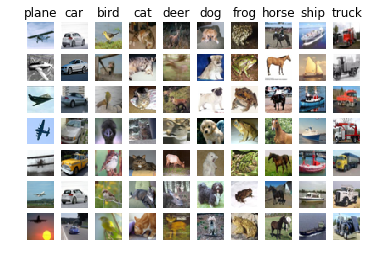

In [3]:
#可视化样例
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes=len(classes)
samples_per_class=7
for y, cls in enumerate(classes):
    #每次抽取一个类别
    idxs = np.flatnonzero(y_train==y)
    #idxs数组中随机抽取7个值 不可放回的抽取
    idxs = np.random.choice(idxs,samples_per_class,replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i*num_classes+y+1
        #直接指定划分方式和位置进行绘图。plt.subplot(2,2,1) #要生成两行两列，这是第一个图plt.subplot('行','列','编号')
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i ==0:
            plt.title(cls)
plt.show()
    

In [4]:
num_training=5000
mask=range(num_training)
x_train=x_train[mask]
y_train=y_train[mask]
num_test=500
mask=range(num_test)
x_test=x_test[mask]
y_test=y_test[mask]

In [5]:
x_train=np.reshape(x_train,(x_train.shape[0],-1))
x_test=np.reshape(x_test,(x_test.shape[0],-1))
print(x_train.shape,x_test.shape)

(5000, 3072) (500, 3072)


(500, 3072) (5000, 3072)
(500, 5000)


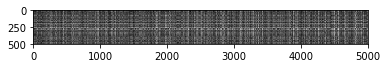

In [16]:
classifier=KNearestNeighbor()
classifier.train(x_train,y_train)
dists=classifier.compute_distances_two_loops(x_test)
print(dists.shape)
plt.imshow(dists, interpolation='none')
plt.show()

In [8]:
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ('got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

got 137 / 500 correct => accuracy: 0.274000


In [17]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

got 139 / 500 correct => accuracy: 0.278000


In [18]:
y_test_pred = classifier.predict_labels(dists, k=15)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

got 136 / 500 correct => accuracy: 0.272000


In [19]:
dists_one=classifier.compute_distances_one_loop(x_test)
difference=np.linalg.norm(dists-dists_one,ord='fro')
print('difference was: %f' % difference)
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

(500, 3072) (5000, 3072)
difference was: 0.000000
Good! The distance matrices are the same


In [20]:
def time_function(f,*args):
    import time
    tic=time.time()
    f(*args)
    toc=time.time()
    return toc-tic

In [21]:
two_loop_time=time_function(classifier.compute_distances_two_loops,x_test)
print('two loops version took %f seconds' % two_loop_time)

one_loop_time=time_function(classifier.compute_distances_one_loop,x_test)
print('one loop version took %f seconds' % one_loop_time)

no_loops_time=time_function(classifier.compute_distances_no_loops,x_test)
print('no loops version took %f seconds' % no_loops_time)

(500, 3072) (5000, 3072)
two loops version took 42.779138 seconds
(500, 3072) (5000, 3072)
one loop version took 48.177160 seconds
no loops version took 0.329593 seconds


In [24]:
num_folds=5
k_choices=[1,3,5,8,10,12,15,20,50,100]
x_train_folds=[]
y_train_folds=[]

y_train=y_train.reshape(-1,1) 
x_train_folds=np.array_split(x_train,num_folds)  #1
y_train_folds=np.array_split(y_train,num_folds)

k_to_accuracies={}  #2

for k in k_choices:
    k_to_accuracies.setdefault(k,[])
for i in range(num_folds):   #3
    classifier=KNearestNeighbor()
    x_val_train=np.vstack(x_train_folds[0:i]+x_train_folds[i+1:])   #3.1
    y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i + 1:])
    y_val_train=y_val_train[:,0] 
    classifier.train(x_val_train,y_val_train)
    for k in k_choices:
        y_val_pred=classifier.predict(x_train_folds[i],k=k)  #3.2
        num_correct=np.sum(y_val_pred==y_train_folds[i][:,0])
        accuracy=float(num_correct)/len(y_val_pred)
        k_to_accuracies[k]=k_to_accuracies[k]+[accuracy]

for k in sorted(k_to_accuracies):  #4
    sum_accuracy=0
    for accuracy in k_to_accuracies[k]:
        print('k=%d, accuracy=%f' % (k,accuracy))
        sum_accuracy+=accuracy
    print('the average accuracy is :%f' % (sum_accuracy/5)) 

k=1, accuracy=0.263000
k=1, accuracy=0.257000
k=1, accuracy=0.264000
k=1, accuracy=0.278000
k=1, accuracy=0.266000
the average accuracy is :0.265600
k=3, accuracy=0.239000
k=3, accuracy=0.249000
k=3, accuracy=0.240000
k=3, accuracy=0.266000
k=3, accuracy=0.254000
the average accuracy is :0.249600
k=5, accuracy=0.248000
k=5, accuracy=0.266000
k=5, accuracy=0.280000
k=5, accuracy=0.292000
k=5, accuracy=0.280000
the average accuracy is :0.273200
k=8, accuracy=0.262000
k=8, accuracy=0.282000
k=8, accuracy=0.273000
k=8, accuracy=0.290000
k=8, accuracy=0.273000
the average accuracy is :0.276000
k=10, accuracy=0.265000
k=10, accuracy=0.296000
k=10, accuracy=0.276000
k=10, accuracy=0.284000
k=10, accuracy=0.280000
the average accuracy is :0.280200
k=12, accuracy=0.260000
k=12, accuracy=0.295000
k=12, accuracy=0.279000
k=12, accuracy=0.283000
k=12, accuracy=0.280000
the average accuracy is :0.279400
k=15, accuracy=0.252000
k=15, accuracy=0.289000
k=15, accuracy=0.278000
k=15, accuracy=0.282000


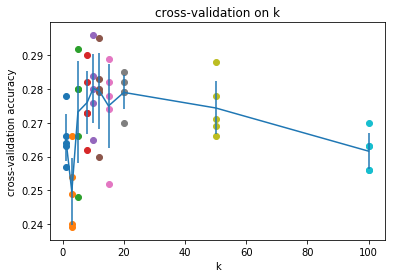

In [26]:
for k in k_choices:
    accuracies=k_to_accuracies[k]
    plt.scatter([k]*len(accuracies),accuracies) 

accuracies_mean=np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std=np.array([np.std(v) for k ,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices,accuracies_mean,yerr=accuracies_std)
plt.title('cross-validation on k')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')
plt.show()

In [31]:
best_k=10
classifier=KNearestNeighbor()
classifier.train(x_train,y_train)
y_test_pred=classifier.predict(x_test,k=best_k)

ValueError: object too deep for desired array

In [ ]:
num_correct=np.sum(y_test_pred==y_test)
accuracy=float(num_correct)/num_test
print('got %d / %d correct => accuracy: %f' % (num_correct,num_test,accuracy))